# Extracting bitcoin data from web to MySql database then visuliazing it

### Importing

In [ ]:
!pip install plotly==5.3.1
!pip install pandas==1.3.3
!pip install requests==2.26.0
!pip install mysql-connector-python==8.0.17
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4

In [ ]:
import mysql.connector
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import datetime
from datetime import date
import time
import re

### Connecting database and functions 

In [ ]:
cnx = mysql.connector.connect(user='root',password='Asdasgf246*',
                                 host='localhost',database = "testdb")
cursor = cnx.cursor()    
def db_adder(cursor,id,date,price):
    cursor.execute(
     'INSERT INTO testdb.bitcoin_data (ID,DATE,PRICE) VALUES ({},\"{}\",{:^2});'.format(id,date,price))
def return_last_id(cursor):
    cursor.execute(
        "SELECT ID FROM testdb.bitcoin_data ORDER BY ID DESC LIMIT 1")
    count = cursor.fetchall()
    if not count:
        count = 0
    else:
        count = count[0][0]+1
    return count

### Extracting patterns and commiting to database

In [22]:
url = "https://api.binance.com/api/v3/ticker/price?symbol=BTCUSDT"
data = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
id = return_last_id(cursor)
while True:
    data = requests.get(url).text
    soup = BeautifulSoup(data,"html5lib")
    price_data_html = soup.find("body")
    price_data_re = re.search(r"price\":\"([0-9]+\.[0-9]+)",str(price_data_html))
    price_data = price_data_re.group(1)
    price_data = float(price_data)
    date_time = str(datetime.now())
    date_data_re = re.search(r"(.*) ",str(date_time))
    date_data = date_data_re.group(1)
    db_adder(cursor,id,date_data,price_data)
    cnx.commit()
    id += 1
    time.sleep(10)

KeyboardInterrupt: 

### Reading SQL data with Pandas

In [27]:
btc_df = pd.read_sql("SELECT * FROM testdb.bitcoin_data",cnx)
btc_df.head()

,ID,DATE,PRICE
0,0,2022-08-14,24510.4
1,1,2022-08-14,24513.9
2,2,2022-08-14,24515.4
3,3,2022-08-14,24514.3
4,4,2022-08-14,24502.2


### Plotting

<AxesSubplot:xlabel='DATE'>

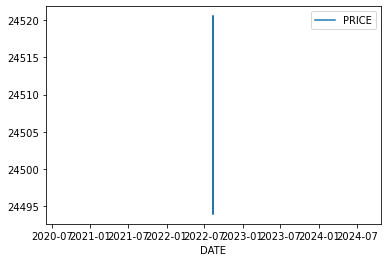

In [23]:
btc_df.plot(x="DATE",y="PRICE")